# HABOOK - Dataset (Subject-based Analysis)
by Nuttaphat (Chiang), Dr. Ku (Oskar)

-------------------------------------------------------------------------------------------------------------------------------

# 1. OBJECTIVES


<li>To understand the interactions performed by teachers <br>
<li>To identify the popularity based on the taught subjects <br>
<li>To discover meaningful interactions and patterns occured <br>

<li> <b>Data Explanation:</b> the data were collected via the use of HiTEACH. The participants were <u>elementary schools in China</u>, whose subjects were taught differently.

-------------------------------------------------------------------------------------------------------------------------------

# 2. LIBRARIES PREPARATION

In [22]:
###------------------------------------------------------------------------------------------------------------###
## Call required libraries ##

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
sns.set(style="darkgrid")

#!pip install plotly
import plotly as py #For World Map
#py.tools.set_credentials_file(username='#', api_key='#')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                   # For os related operations
import sys                    # For data size


from jupyterthemes import jtplot # Import jtplot module in notebook
jtplot.style() # Using the currently-used style


from IPython.display import display, HTML, clear_output  # Hide code cells for clean presentation and import display table

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
###------------------------------------------------------------------------------------------------------------###

-------------------------------------------------------------------------------------------------------------------------------

# 3. DATA PRE-PROCESSING

The data were collected from the use of HiTEACH. There were 3747 sample classes; however, after data-cleaning process, the sample, namely 'data_cleaned', consisted of 2065 classes were used to visualised and analysed.

As indicated by 'subject_count', 27 subjects were identified.

Furthermore, factors, namely <b>'PICKUP','TIMER','SCOREBOARD','POPQUIZ','FLIP CARD','CHARTS','Buzz-in','PUSH','Work Comp.'</b>, were analysed.

In [23]:
###------------------------------------------------------------------------------------------------------------###
## Data Preparation ##
df = pd.read_excel('https://raw.githubusercontent.com/nat236919/Data_Science/master/subject-based_missing_values=0_revised.xlsx')
print(df.head())

# Getting rid of missing subjects (value == 0)
"""
for index, row in df.iterrows():        # Method 1 (Replace df with a new one)
    if row['Subject'] == 0:
        df.drop(index, inplace=True)
"""
df_cleaned = df.loc[df['Subject'] != 0]         # Method 2 (Create a duplicate version as 'df_cleaned')

# Re-indexing
def reindex(df_temp):
    df_temp.index.names = [None]
    count = [i for i in range(df_temp.iloc[:,0].count())] # Create a list a range of 0 to a number of rows
    df_temp['Index'] = count  
    try:
        df_temp = df_temp.set_index('Index', inplace=True)
    except:
        pass 
    return df_temp

reindex(df_cleaned)

subject_count = df_cleaned.set_index('Subject') # Count subjects and use them as indices

df_by_subject = subject_count.groupby('Subject').mean()[['PICKUP','TIMER','SCOREBOARD','POPQUIZ',
            'FLIP CARD','CHARTS','Buzz-in','PUSH','Work Comp.']] # Group by subjects showing the average of values (params)

df_by_subject_top_8 = df_by_subject.loc[['Chinese','Mathematics','Class_Meeting','English','Art',
                                         'Music','Science','Admission_Course'],:]

###------------------------------------------------------------------------------------------------------------###

         ExNO  MemberID  CourseNO  tba_id Teacher Class Title Course  \
0  2000075010     61667      5190   19241     刘星岑      《摩天高塔》    4.1   
1  2000075001     61538      5180   19232     黄丽霞        《练习》    2.6   
2  2000074989     61515      5193   19222    李  丽        《地名》    4.4   
3  2000074988     61537      5185   19221     李佩洁  《钢笔字练习第八讲》    3.2   
4  2000074986    121975      5320   19219      傅越        《跳绳》   1.12   

       Subject                 Time  PICKUP        ...         \
0        STEAM  2018-11-07 15:52:25       1        ...          
1      Chinese  2018-11-07 15:37:29       0        ...          
2      Chinese  2018-11-07 14:57:53       0        ...          
3          Art  2018-11-07 14:56:07       5        ...          
4  Mathematics  2018-11-07 14:54:45       2        ...          

   Individual learning  Student-centered decision  Multiple Assessment  \
0               0.3549                     0.4013               0.7475   
1               0.3518      

C:\Users\MrGEAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



-------------------------------------------------------------------------------------------------------------------------------

# 4. DATA VISUALISATION

In this section, visuals are discussed individually.

,Subject
Chinese,752
Mathematics,439
Class_Meeting,176
English,135
Art,118
Music,97
Science,94
Software_Test,84
Admission_Course,83
Training_Exchange,26


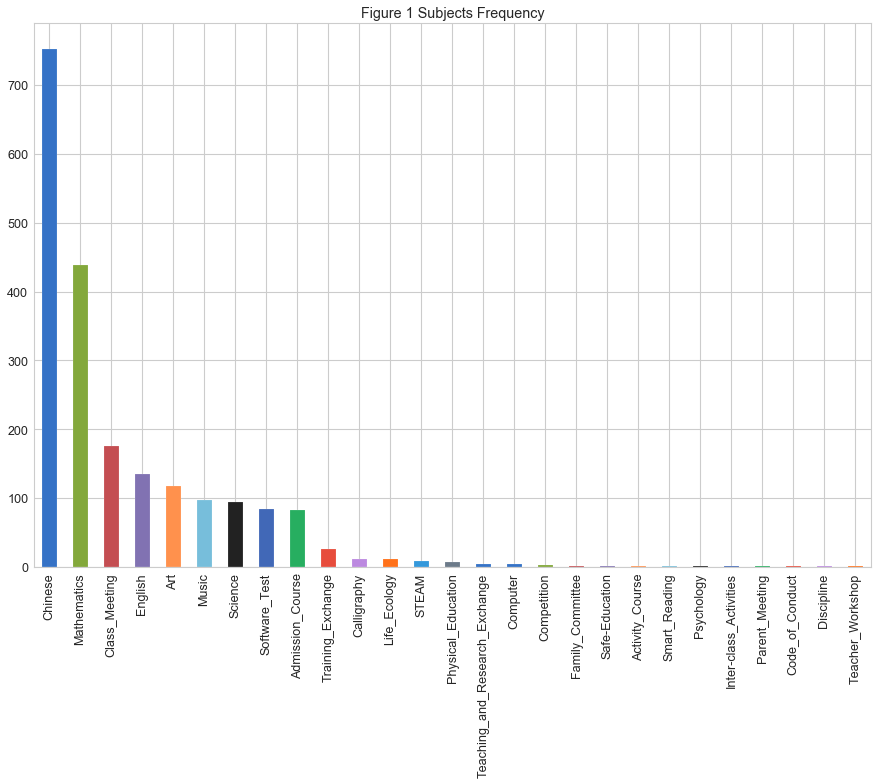

In [24]:
display(pd.DataFrame(df_cleaned['Subject'].value_counts()))

fig1 = df_cleaned['Subject'].value_counts().plot.bar(title='Figure 1 Subjects Frequency',figsize=(15,10)) # Frequency of Subjects

Figure 1 shows the most popular taught classes based on the data collected

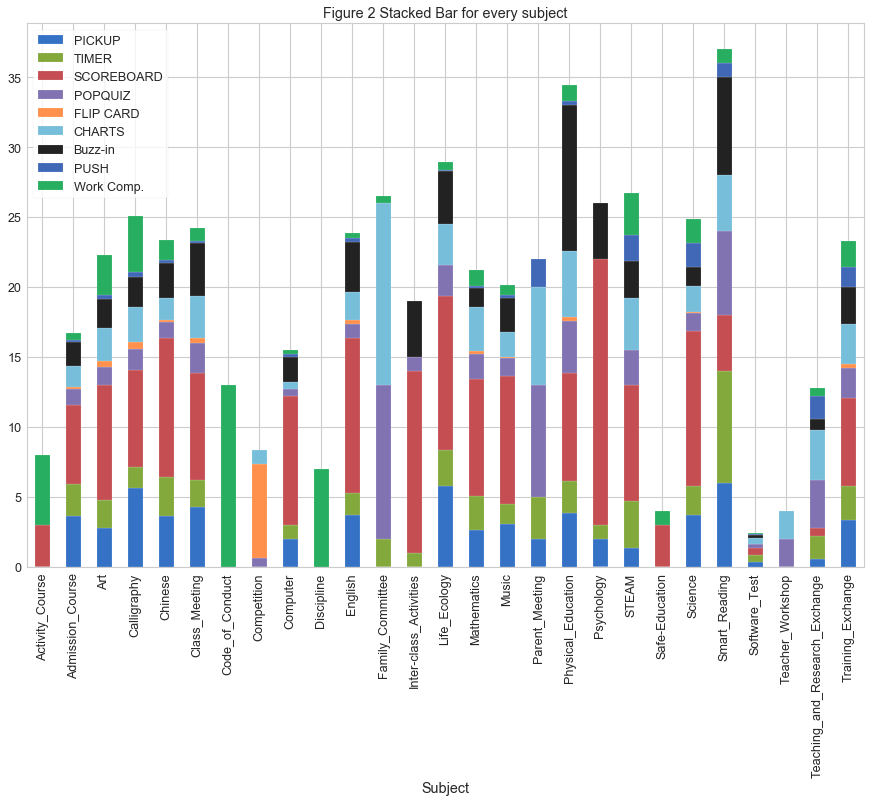

In [25]:
fig2 = df_by_subject.sort_index().plot.bar(stacked=True, title='Figure 2 Stacked Bar for every subject',figsize=(15,10))

### NOTATION 1
As can be observed from <b>Figure 1</b>, a subject category <b>'Chinese'</b> is the most taught classes (<b><i>n</i> > 700</b>), followed by <b>'Mathematics'</b> (<b><i>n</i> > 400</b>), <b>'Class Meeting'</b> (<b><i>n</i> > 170</b>), and so on.
<br> Lastly, <b>Figure 2</b> demonstrates the use of functions on HiTEACH based on every subject

-------------------------------------------------------------------------------------------------------------------------------

,0
SCOREBOARD,8.692010
PICKUP,3.285714
TIMER,2.266344
Buzz-in,2.251816
CHARTS,2.141404
POPQUIZ,1.370460
Work Comp.,1.243099
PUSH,0.283293
FLIP CARD,0.222276


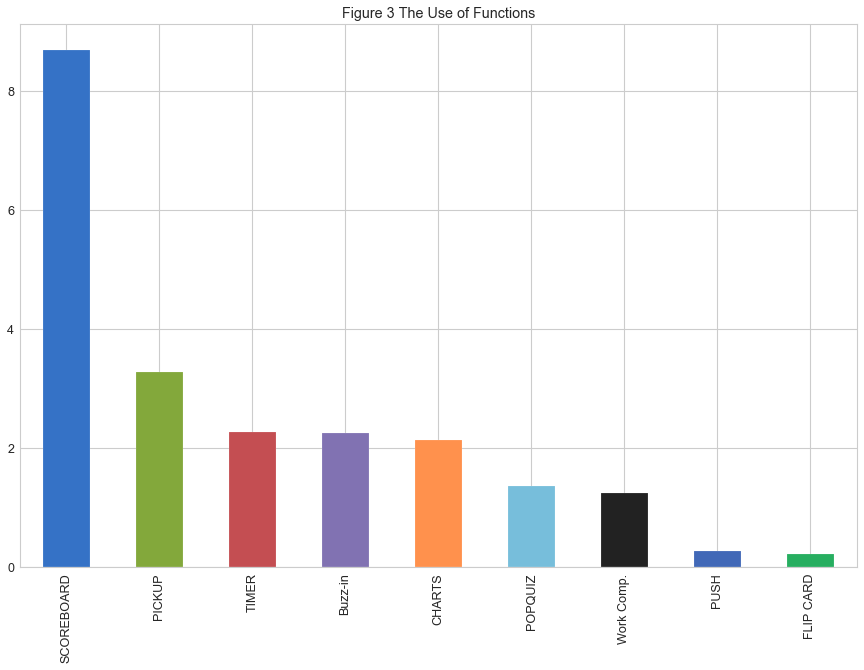

In [26]:
display(pd.DataFrame(df_cleaned.mean()[['PICKUP','TIMER','SCOREBOARD','POPQUIZ',
            'FLIP CARD','CHARTS','Buzz-in','PUSH','Work Comp.']].sort_values(ascending=False)))

df_cleaned.mean()[['PICKUP','TIMER','SCOREBOARD','POPQUIZ',
            'FLIP CARD','CHARTS','Buzz-in','PUSH','Work Comp.']].sort_values(ascending=False).plot.bar(title='Figure 3 The Use of Functions',
                                         figsize=(15,10))

<b>Figure 3</b> shows the most frequently functions on HiTEACH. As can be observed (on the scales 0-10), 'scoreboard' was highly used, followed by 'PICKUP', 'TIME', and so on.

-------------------------------------------------------------------------------------------------------------------------------

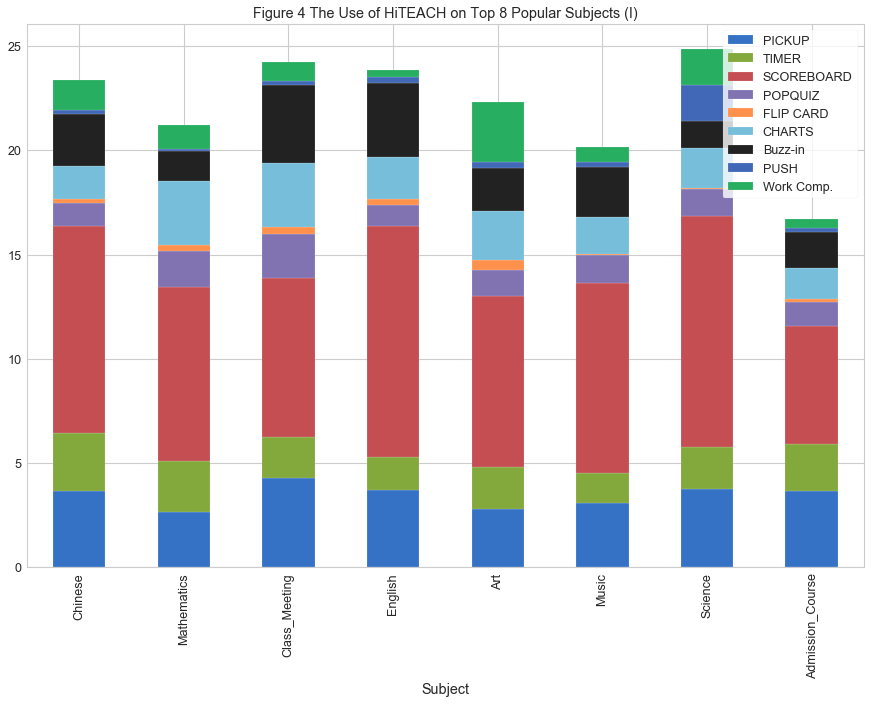

In [27]:
df_by_subject_top_8.plot.bar(stacked = True, title='Figure 4 The Use of HiTEACH on Top 8 Popular Subjects (I)',
                                         figsize=(15,10))

,PICKUP,TIMER,SCOREBOARD,POPQUIZ,FLIP CARD,CHARTS,Buzz-in,PUSH,Work Comp.
Subject,,,,,,,,,
Chinese,3.676862,2.775266,9.926862,1.109043,0.170213,1.598404,2.501330,0.186170,1.433511
Mathematics,2.669704,2.410023,8.355353,1.756264,0.257403,3.102506,1.405467,0.129841,1.138952
Class_Meeting,4.295455,1.937500,7.664773,2.073864,0.363636,3.039773,3.755682,0.198864,0.926136
English,3.681481,1.629630,11.051852,1.022222,0.266667,2.014815,3.555556,0.288889,0.348148
Art,2.813559,1.983051,8.211864,1.271186,0.457627,2.355932,2.067797,0.271186,2.898305
Music,3.092784,1.422680,9.144330,1.298969,0.061856,1.793814,2.381443,0.257732,0.701031
Science,3.734043,2.053191,11.053191,1.287234,0.074468,1.893617,1.329787,1.723404,1.691489
Admission_Course,3.662651,2.265060,5.638554,1.156627,0.156627,1.481928,1.698795,0.192771,0.433735


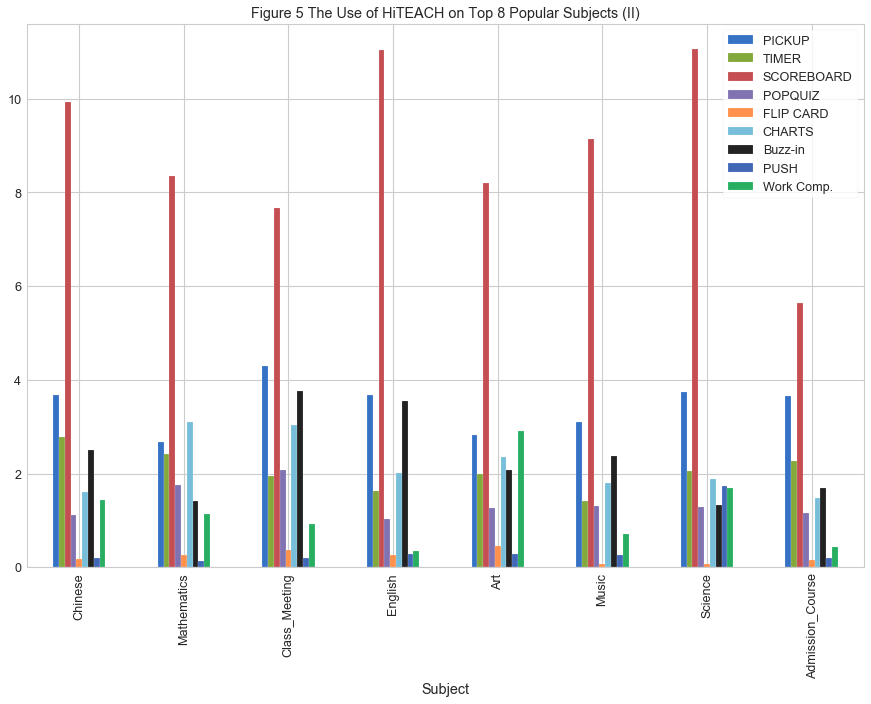

In [28]:
display(df_by_subject_top_8)
df_by_subject_top_8.plot.bar(title='Figure 5 The Use of HiTEACH on Top 8 Popular Subjects (II)', figsize=(15,10))

## PIE CHART GENERATOR

In [ ]:
def create_pie(pie_title, pie_data):
    labels, values = pie_data.index, pie_data.values
    trace = go.Pie(labels=labels, values=values, title=pie_title)
    return trace

while(True):  
    print('Factors: PICKUP, TIMER, SCOREBOARD, POPQUIZ, FLIP CARD, CHARTS, Buzz-in, PUSH, Work Comp.')
    print('To exit press type \'EXIT\'')

    prompt = input('Please type in choose a factor to show a pie chart (Ex. PICKUP):')
    if(prompt.lower()=='exit'):
        print('----------------------EXIT SUCCESSFULLY----------------------')
        break
        
    else:
        clear_output(wait=True)
        py.offline.iplot([create_pie(prompt, df_by_subject_top_8[prompt])], filename='basic_pie_chart')

Factors: PICKUP, TIMER, SCOREBOARD, POPQUIZ, FLIP CARD, CHARTS, Buzz-in, PUSH, Work Comp.
To exit press type 'EXIT'


-------------------------------------------------------------------------------------------------------------------------------

# 5. DATA VISUALISATION (Correlations)

In this section, correlations are displayed invidually.
(Under maintainance)

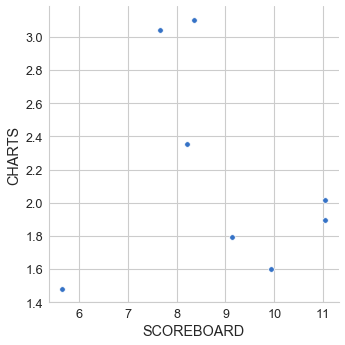

In [30]:
sns.relplot(x='SCOREBOARD', y='CHARTS', data=df_by_subject_top_8)